In [1]:
%matplotlib inline

from dicom_utils import *
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
#import assd_func as af
from skimage import morphology
import matplotlib.patches as mpatches
import assd_func_Sobel_2 as af_Sobel
import time
import random
from scipy.stats import uniform,norm

In [2]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\1"
output_dir = "Output"
images_1, slices_1, contours_1, labels_1, dummy_mask_1 = main(dicom_dir, output_dir)

dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\2"
output_dir = "Output"
#No rectum
images_2, slices_2, contours_2, labels_2, dummy_mask_2 = main(dicom_dir, output_dir)

In [4]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\3"
output_dir = "Output"
images_3, slices_3, contours_3, labels_3, dummy_mask_3 = main(dicom_dir, output_dir)

In [5]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\4"
output_dir = "Output"
images_4, slices_4, contours_4, labels_4, dummy_mask_4 = main(dicom_dir, output_dir)

   Missing contours for structure: sigmoid


In [6]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\5"
output_dir = "Output"
images_5, slices_5, contours_5, labels_5, dummy_mask_5 = main(dicom_dir, output_dir)

   Missing contours for structure: CTV_
   Missing contours for structure: SeminalVes_Dist
   Missing contours for structure: Hot Spot 7210 cGy (Rectum)
   Missing contours for structure: Hot Spot 7350 cGy (Total PTV)


In [7]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\6"
output_dir = "Output"
images_6, slices_6, contours_6, labels_6, dummy_mask_6 = main(dicom_dir, output_dir)

In [8]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\7"
output_dir = "Output"
images_7, slices_7, contours_7, labels_7, dummy_mask_7 = main(dicom_dir, output_dir)

In [9]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\8"
output_dir = "Output"
images_8, slices_8, contours_8, labels_8, dummy_mask_8 = main(dicom_dir, output_dir)

In [10]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\9"
output_dir = "Output"
images_9, slices_9, contours_9, labels_9, dummy_mask_9 = main(dicom_dir, output_dir)

In [11]:
dicom_dir = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\Prostate Cases\\10"
output_dir = "Output"
images_10, slices_10, contours_10, labels_10, dummy_mask_10 = main(dicom_dir, output_dir)

   Missing contours for structure: ROI_1


# Rectum

In [ ]:
organ_i = 1
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_1[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_1[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_2[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_2[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_3[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_3[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_4[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_4[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_5[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_5[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_6[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_6[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_7[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_7[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_8[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_8[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_9[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_9[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_10[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_10[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

## Paremeter Experimentation

In [8]:
def dice_coef(seg, gt, k=1):
    dice = np.sum(seg[gt==k])*2.0 / (np.sum(seg) + np.sum(gt))
    return dice

def create_log(df, c, k, w, ismax, dice):
    if ismax:
        ismax = "max"
    else: 
        ismax = "min"
    df = df.append({'c' : c, 'k' : k, 'w': w, 'min/max' : ismax, 'dice': dice},  
                ignore_index = True) 
    return df

In [ ]:
target_img1 = images_1[75, ...]
target_label1 = labels_1[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 10, 15, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 1
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask1, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img1, target_label1, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du1 = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False)
    dice = dice_coef(du1, target_label1, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(1, 5, i + 1)
    plt.imshow(target_img1, cmap="gray")
    plt.contour(target_label1, levels=[0.5, 1.5, 2.5, 3.5, 1.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 1.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

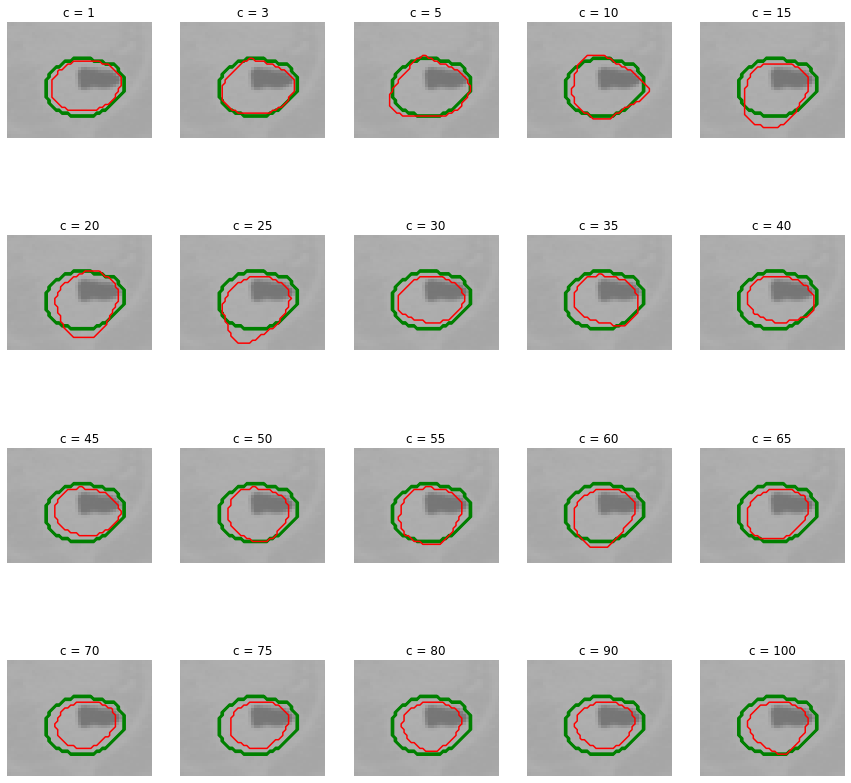

In [11]:
target_img2 = images_2[75, ...]
target_label2 = labels_2[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 20, 25, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask2, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img2, target_label2, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du2 = af_Sobel.plotting_assd(dx, dy, mask, target_img2, quiver=False, plot=False)
    dice = dice_coef(du2, target_label2, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(2, 5, i + 1)
    plt.imshow(target_img2, cmap="gray")
    plt.contour(target_label2, levels=[0.5, 1.5, 2.5, 3.5, 2.5], colors="green")
    plt.contour(du2, levels=[0.5, 1.5, 2.5, 3.5, 2.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img3 = images_3[75, ...]
target_label3 = labels_3[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 30, 35, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask3, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img3, target_label3, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du3 = af_Sobel.plotting_assd(dx, dy, mask, target_img3, quiver=False, plot=False)
    dice = dice_coef(du3, target_label3, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(3, 5, i + 1)
    plt.imshow(target_img3, cmap="gray")
    plt.contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 3.5], colors="green")
    plt.contour(du3, levels=[0.5, 1.5, 2.5, 3.5, 3.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img4 = images_4[75, ...]
target_label4 = labels_4[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask4, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img4, target_label4, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du4 = af_Sobel.plotting_assd(dx, dy, mask, target_img4, quiver=False, plot=False)
    dice = dice_coef(du4, target_label4, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(4, 5, i + 1)
    plt.imshow(target_img4, cmap="gray")
    plt.contour(target_label4, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du4, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img5 = images_5[75, ...]
target_label5 = labels_5[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 50, 55, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask5, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img5, target_label5, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du5 = af_Sobel.plotting_assd(dx, dy, mask, target_img5, quiver=False, plot=False)
    dice = dice_coef(du5, target_label5, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 5, i + 1)
    plt.imshow(target_img5, cmap="gray")
    plt.contour(target_label5, levels=[0.5, 1.5, 2.5, 3.5, 5.5], colors="green")
    plt.contour(du5, levels=[0.5, 1.5, 2.5, 3.5, 5.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img6 = images_6[75, ...]
target_label6 = labels_6[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 60, 65, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask6, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img6, target_label6, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du6 = af_Sobel.plotting_assd(dx, dy, mask, target_img6, quiver=False, plot=False)
    dice = dice_coef(du6, target_label6, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(6, 5, i + 1)
    plt.imshow(target_img6, cmap="gray")
    plt.contour(target_label6, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="green")
    plt.contour(du6, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img7 = images_7[75, ...]
target_label7 = labels_7[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 70, 75, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask7, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img7, target_label7, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du7 = af_Sobel.plotting_assd(dx, dy, mask, target_img7, quiver=False, plot=False)
    dice = dice_coef(du7, target_label7, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(7, 5, i + 1)
    plt.imshow(target_img7, cmap="gray")
    plt.contour(target_label7, levels=[0.5, 1.5, 2.5, 3.5, 7.5], colors="green")
    plt.contour(du7, levels=[0.5, 1.5, 2.5, 3.5, 7.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img8 = images_8[75, ...]
target_label8 = labels_8[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 80, 85, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask8, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img8, target_label8, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du8 = af_Sobel.plotting_assd(dx, dy, mask, target_img8, quiver=False, plot=False)
    dice = dice_coef(du8, target_label8, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(8, 5, i + 1)
    plt.imshow(target_img8, cmap="gray")
    plt.contour(target_label8, levels=[0.5, 1.5, 2.5, 3.5, 8.5], colors="green")
    plt.contour(du8, levels=[0.5, 1.5, 2.5, 3.5, 8.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img9 = images_9[75, ...]
target_label9 = labels_9[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 90, 95, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask9, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img9, target_label9, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du9 = af_Sobel.plotting_assd(dx, dy, mask, target_img9, quiver=False, plot=False)
    dice = dice_coef(du9, target_label9, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(9, 5, i + 1)
    plt.imshow(target_img9, cmap="gray")
    plt.contour(target_label9, levels=[0.5, 1.5, 2.5, 3.5, 9.5], colors="green")
    plt.contour(du9, levels=[0.5, 1.5, 2.5, 3.5, 9.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img10 = images_10[75, ...]
target_label10 = labels_10[..., organ_i][75, ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 100, 105, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask10, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img10, target_label10, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_i, ismax=ismax, smooth=True)
    du10 = af_Sobel.plotting_assd(dx, dy, mask, target_img10, quiver=False, plot=False)
    dice = dice_coef(du10, target_label10, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(10, 5, i + 1)
    plt.imshow(target_img10, cmap="gray")
    plt.contour(target_label10, levels=[0.5, 1.5, 2.5, 3.5, 10.5], colors="green")
    plt.contour(du10, levels=[0.5, 1.5, 2.5, 3.5, 10.5], colors="red")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()